In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#read dataset
df = pd.read_csv("energy.csv")

# Data Cleaning

In [5]:
#dataset shape
df.shape

(16599, 8)

In [6]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   States       16599 non-null  object 
 1   Regions      16599 non-null  object 
 2   latitude     16599 non-null  float64
 3   longitude    16599 non-null  float64
 4   Dates        16599 non-null  object 
 5   temperature  16599 non-null  float64
 6   humidity     16599 non-null  int64  
 7   Usage        16599 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.0+ MB


In [7]:
#finding null values
df.isnull().sum()

States         0
Regions        0
latitude       0
longitude      0
Dates          0
temperature    0
humidity       0
Usage          0
dtype: int64

In [8]:
#formatting dates
df['Dates'] = pd.to_datetime(df['Dates'], dayfirst = True)

In [9]:
#sorting dataset by States and Dates
df = df.sort_values(by = ['States', 'Dates'])

# Feature Engineering

In [10]:
#Adding day of week column
df['Day_of_week'] = df['Dates'].dt.dayofweek

In [11]:
#Adding is weekend column
df['is_weekend'] = df['Day_of_week'].isin([5,6]).astype(int)

In [12]:
#Adding month column
df['month'] = df['Dates'].dt.month

In [13]:
#Adding lag_1
df['lag_1'] = df.groupby('States')['Usage'].shift(1)

In [14]:
#Adding 7 day average
df['rolling_7'] = df.groupby('States')['Usage'].transform(lambda x: x.shift(1).rolling(window=7).mean())

In [15]:
#printing head
df.head()

,States,Regions,latitude,longitude,Dates,temperature,humidity,Usage,Day_of_week,is_weekend,month,lag_1,rolling_7
15,Andhra Pradesh,SR,14.750429,78.570026,2019-01-02,23.1,56,164.6,2,0,1,NaN,NaN
48,Andhra Pradesh,SR,14.750429,78.570026,2019-01-03,24.0,57,170.1,3,0,1,164.6,NaN
81,Andhra Pradesh,SR,14.750429,78.570026,2019-01-04,24.0,59,165.2,4,0,1,170.1,NaN
114,Andhra Pradesh,SR,14.750429,78.570026,2019-01-05,23.5,64,167.4,5,1,1,165.2,NaN
147,Andhra Pradesh,SR,14.750429,78.570026,2019-01-06,23.7,60,171.2,6,1,1,167.4,NaN


In [16]:
df.tail()

,States,Regions,latitude,longitude,Dates,temperature,humidity,Usage,Day_of_week,is_weekend,month,lag_1,rolling_7
16458,West Bengal,ER,22.58039,88.329947,2020-12-01,21.3,67,172.6,1,0,12,168.7,162.857143
16491,West Bengal,ER,22.58039,88.329947,2020-12-02,22.0,64,174.4,2,0,12,172.6,163.971429
16524,West Bengal,ER,22.58039,88.329947,2020-12-03,22.3,64,169.8,3,0,12,174.4,163.728571
16557,West Bengal,ER,22.58039,88.329947,2020-12-04,22.1,68,145.5,4,0,12,169.8,162.571429
16590,West Bengal,ER,22.58039,88.329947,2020-12-05,21.9,73,110.4,5,1,12,145.5,160.242857


In [17]:
#dropping null values
df = df.dropna()



In [18]:
# mean_usage = df["Usage"].mean()
# df.fillna({"lag_1": mean_usage}, inplace = True)
# df.fillna({"rolling_7": mean_usage}, inplace = True)

In [19]:
df.shape

(16368, 13)

In [20]:
df.head()

,States,Regions,latitude,longitude,Dates,temperature,humidity,Usage,Day_of_week,is_weekend,month,lag_1,rolling_7
246,Andhra Pradesh,SR,14.750429,78.570026,2019-01-09,25.5,41,163.0,2,0,1,160.8,166.528571
279,Andhra Pradesh,SR,14.750429,78.570026,2019-01-10,24.2,58,168.8,3,0,1,163.0,166.300000
312,Andhra Pradesh,SR,14.750429,78.570026,2019-01-11,24.8,63,167.7,4,0,1,168.8,166.114286
345,Andhra Pradesh,SR,14.750429,78.570026,2019-01-12,24.9,60,168.1,5,1,1,167.7,166.471429
378,Andhra Pradesh,SR,14.750429,78.570026,2019-01-13,24.7,59,164.9,6,1,1,168.1,166.571429


In [21]:
#checking dataset info
df.describe()

,latitude,longitude,Dates,temperature,humidity,Usage,Day_of_week,is_weekend,month,lag_1,rolling_7
count,16368.000000,16368.000000,16368,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000,16368.000000
mean,23.178220,81.794533,2019-09-29 06:43:32.903225856,22.604784,70.301381,103.037140,2.991935,0.280242,5.979839,103.024304,102.955307
min,8.900373,71.192400,2019-01-09 00:00:00,-27.900000,11.000000,0.300000,0.000000,0.000000,1.000000,0.300000,0.514286
25%,19.820430,76.569993,2019-05-16 18:00:00,18.900000,60.000000,6.700000,1.000000,0.000000,3.000000,6.700000,6.914286
50%,23.835404,78.570026,2019-09-15 12:00:00,25.000000,75.000000,64.400000,3.000000,0.000000,5.500000,64.400000,67.171429
75%,27.333330,88.329947,2020-01-27 06:00:00,28.100000,84.000000,173.925000,5.000000,1.000000,9.000000,173.900000,175.725000
max,33.450000,94.216667,2020-12-05 00:00:00,39.000000,99.000000,522.100000,6.000000,1.000000,12.000000,522.100000,507.528571
std,6.146578,7.258432,NaN,8.743747,17.464059,116.112141,1.986896,0.449131,3.436098,116.090233,114.865385


# Data Visualization

In [22]:
df.to_csv("new_energy.csv")

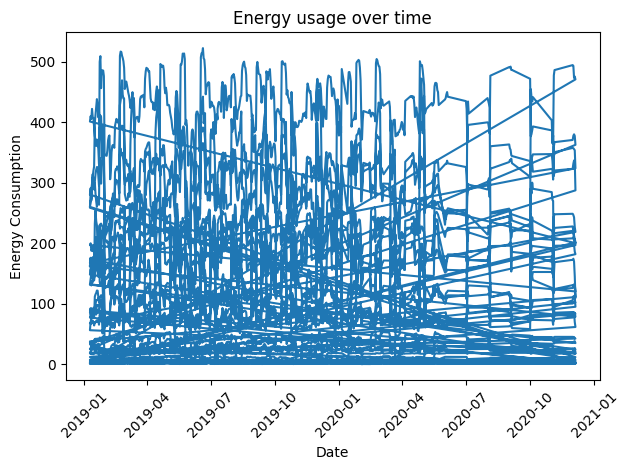

In [23]:
#Energy Consumption over time
plt.plot(df['Dates'], df['Usage'])
plt.title("Energy usage over time")
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

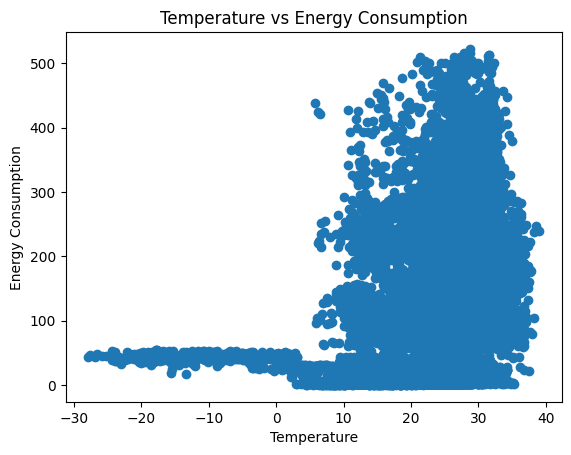

In [24]:
#Temperature vs Energy Consumption
plt.figure()
plt.scatter(df['temperature'], df['Usage'])
plt.title("Temperature vs Energy Consumption")
plt.xlabel("Temperature")
plt.ylabel("Energy Consumption")
plt.show()

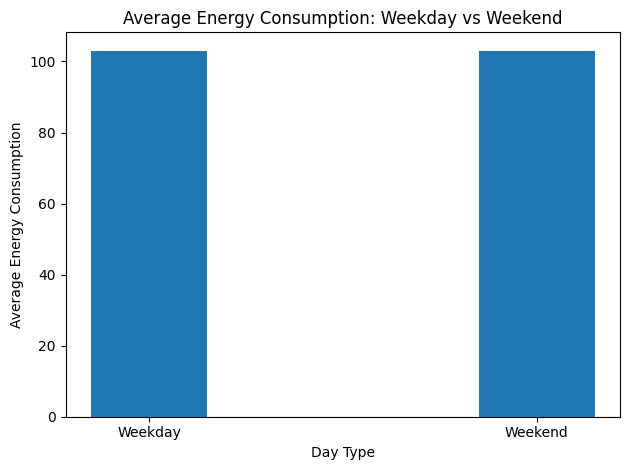

In [25]:
#Weekday vs Weekend Consumption
weekend_usage = df.groupby('is_weekend')['Usage'].mean()
plt.figure()
plt.bar(["Weekday", "Weekend"], weekend_usage, width = 0.3, align = 'center')
plt.title("Average Energy Consumption: Weekday vs Weekend")
plt.xlabel("Day Type")
plt.ylabel("Average Energy Consumption")
plt.tight_layout()
plt.show()

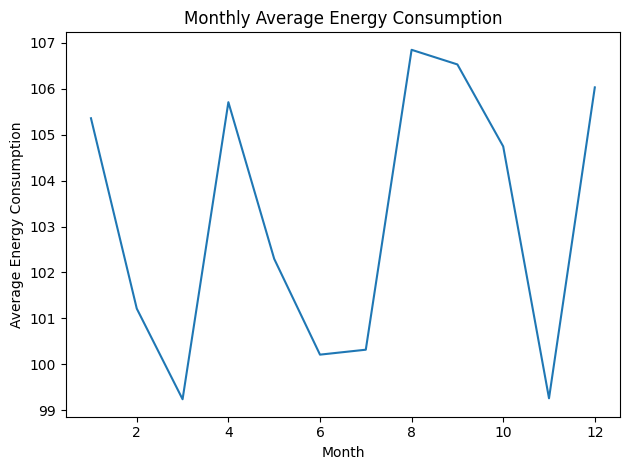

In [26]:
#Monthly average energy usage
monthly_usage = df.groupby('month')['Usage'].mean()
plt.figure()
plt.plot(monthly_usage.index, monthly_usage.values)
plt.title("Monthly Average Energy Consumption")
plt.xlabel("Month")
plt.ylabel("Average Energy Consumption")
plt.tight_layout()
plt.show()

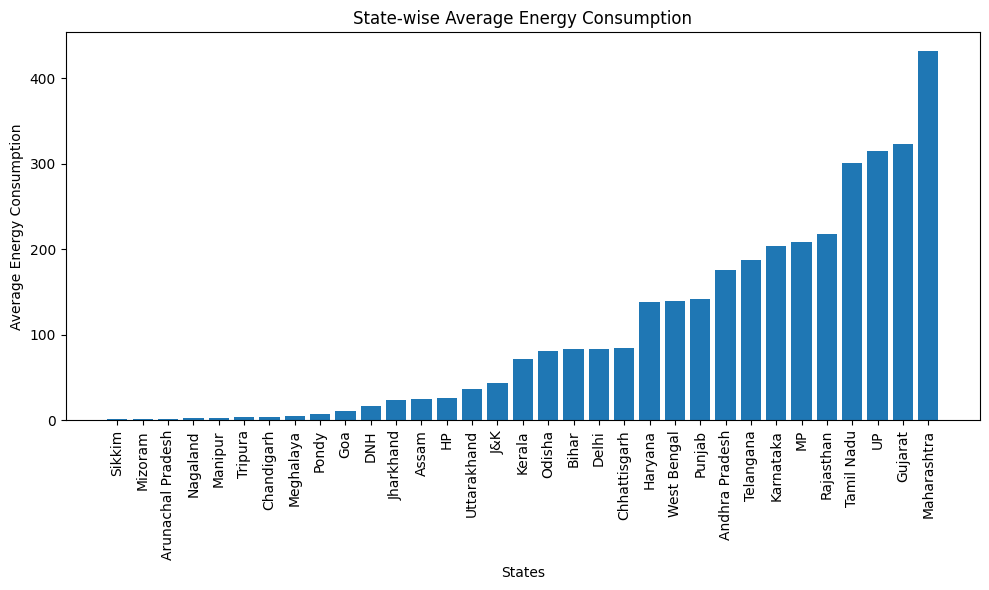

In [27]:
#State-wise Average Energy Consumption
state_usage = df.groupby('States')['Usage'].mean().sort_values()
plt.figure(figsize = (10,6))
plt.bar(state_usage.index, state_usage.values)
plt.title("State-wise Average Energy Consumption")
plt.xlabel("States")
plt.ylabel("Average Energy Consumption")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

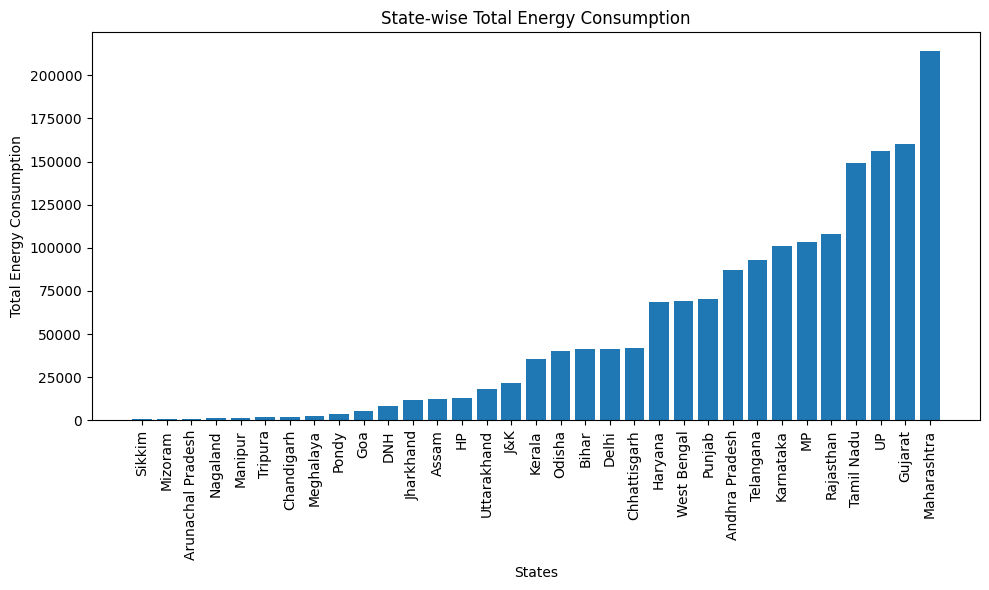

In [28]:
#State-wise Total Energy Consumption
state_total = df.groupby('States')['Usage'].sum().sort_values()
plt.figure(figsize = (10,6))
plt.bar(state_total.index, state_total.values)
plt.title("State-wise Total Energy Consumption")
plt.xlabel("States")
plt.ylabel("Total Energy Consumption")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

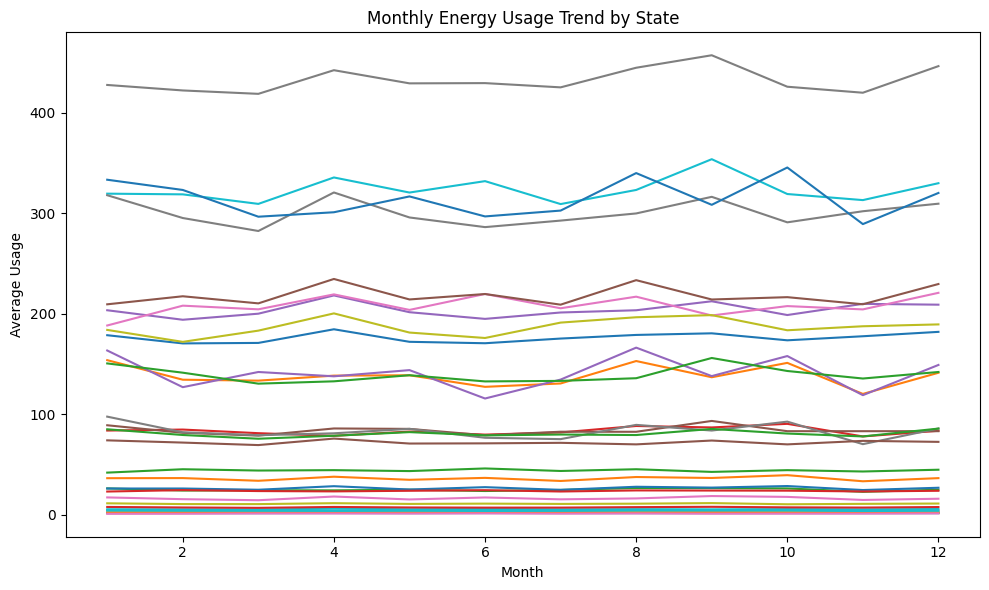

In [29]:
monthly_state = df.groupby(['States','month'])['Usage'].mean().unstack()

plt.figure(figsize=(10,6))

for state in monthly_state.index:
    plt.plot(monthly_state.columns, monthly_state.loc[state])

plt.title("Monthly Energy Usage Trend by State")
plt.xlabel("Month")
plt.ylabel("Average Usage")
plt.tight_layout()
plt.show()

<Axes: ylabel='Usage'>

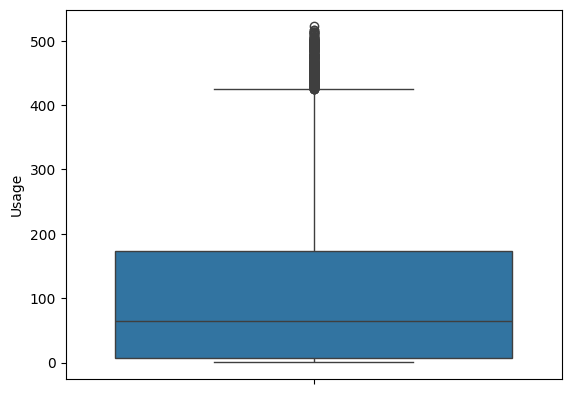

In [30]:
sns.boxplot(data = df['Usage'])

In [31]:
attributes = ['latitude', 'longitude', 'temperature', 'humidity', 'Day_of_week', 'is_weekend', 'month', 'lag_1', 'rolling_7', 'Usage']
df[attributes].corr()

,latitude,longitude,temperature,humidity,Day_of_week,is_weekend,month,lag_1,rolling_7,Usage
latitude,1.000000e+00,1.808093e-01,-0.492074,-0.005484,-4.333941e-16,-1.268512e-17,-1.201235e-16,-0.253644,-0.255846,-0.253736
longitude,1.808093e-01,1.000000e+00,-0.126765,0.384024,1.171297e-15,-1.836576e-16,7.612409e-16,-0.524637,-0.530023,-0.524617
temperature,-4.920742e-01,-1.267646e-01,1.000000,-0.177377,6.440522e-04,-3.073419e-03,8.481881e-02,0.275758,0.278443,0.276151
humidity,-5.484445e-03,3.840237e-01,-0.177377,1.000000,5.604249e-03,-3.804679e-03,3.089957e-01,-0.299568,-0.300356,-0.299421
Day_of_week,-4.333941e-16,1.171297e-15,0.000644,0.005604,1.000000e+00,7.888102e-01,-7.111681e-03,0.000441,-0.001492,-0.000080
is_weekend,-1.268512e-17,-1.836576e-16,-0.003073,-0.003805,7.888102e-01,1.000000e+00,-8.097081e-03,0.000197,0.000112,0.000066
month,-1.201235e-16,7.612409e-16,0.084819,0.308996,-7.111681e-03,-8.097081e-03,1.000000e+00,0.004267,0.004044,0.004652
lag_1,-2.536443e-01,-5.246370e-01,0.275758,-0.299568,4.413827e-04,1.971238e-04,4.266668e-03,1.000000,0.984882,0.991055
rolling_7,-2.558460e-01,-5.300229e-01,0.278443,-0.300356,-1.491821e-03,1.118611e-04,4.043646e-03,0.984882,1.000000,0.977376
Usage,-2.537360e-01,-5.246168e-01,0.276151,-0.299421,-7.987409e-05,6.600916e-05,4.652086e-03,0.991055,0.977376,1.000000


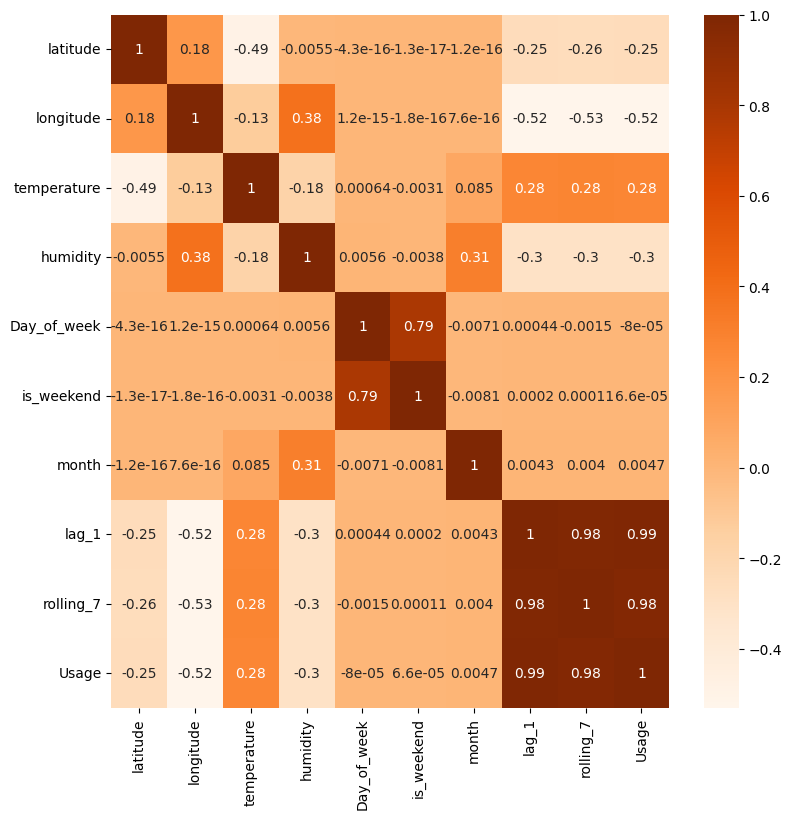

In [32]:
plt.figure(figsize = (9,9))
sns.heatmap(df[attributes].corr(), annot = True, cmap = 'Oranges')
plt.show()

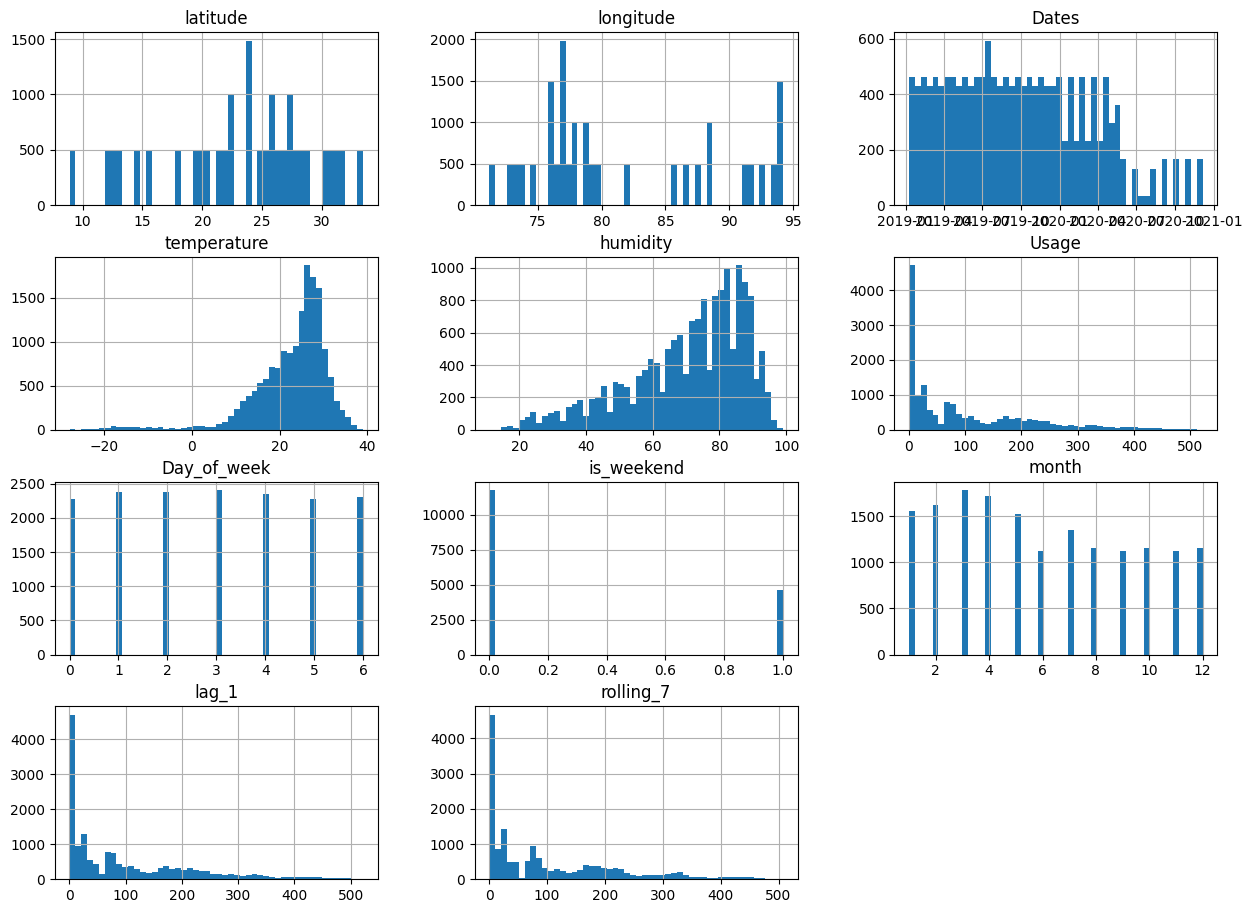

In [33]:
df.hist(bins = 50,figsize = (15,11));

In [ ]:
sns.pairplot(df,hue = "Usage")

# Model Building

In [ ]:
df.columns

In [ ]:
#input features
features = ['latitude', 'longitude', 'temperature', 'humidity', 'Day_of_week', 'is_weekend', 'month', 'lag_1', 'rolling_7']


In [ ]:
df[features].corr()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X = df[features]
y = df['Usage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = False)

In [ ]:
#model buildong
model = RandomForestRegressor(n_estimators = 200, max_depth = 15, min_samples_split = 5, random_state = 42, n_jobs = -1)
model.fit(X_train, y_train)

In [ ]:
#model testing

#testing data
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2score = r2_score(y_test, y_test_pred)

print("Test MAE", test_mae)
print("Test RMSE", test_rmse)
print("Test R2 Score", test_r2score)

#training data
y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2score = r2_score(y_train, y_train_pred)

print("Train MAE", train_mae)
print("Train RMSE", train_rmse)
print("Train R2 Score", train_r2score)

In [ ]:
importance = model.feature_importances_

plt.figure()
plt.bar(features, importance)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

In [ ]:
#model testing

#testing data
y_test_pred1 = model1.predict(X_test)
test_mae1 = mean_absolute_error(y_test, y_test_pred1)
test_rmse1 = np.sqrt(mean_squared_error(y_test, y_test_pred1))
test_r2score1 = r2_score(y_test, y_test_pred1)

print("Test MAE", test_mae1)
print("Test RMSE", test_rmse1)
print("Test R2 Score", test_r2score1)

#training data
y_train_pred1 = model1.predict(X_train)
train_mae1 = mean_absolute_error(y_train, y_train_pred1)
train_rmse1 = np.sqrt(mean_squared_error(y_train, y_train_pred1))
train_r2score1 = r2_score(y_train, y_train_pred1)

print("Train MAE", train_mae1)
print("Train RMSE", train_rmse1)
print("Train R2 Score", train_r2score1)

In [ ]:
importance = model.feature_importances_

plt.figure()
plt.bar(features, importance)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()